# Introduction

Fresnel is a python library that can ray trace publication quality images in real time. It provides a simple python API to define a **scene** consisting of any number of **geometry** primitives and **render** it to an output image.

To start, import the ``fresnel`` python module.

In [1]:
import fresnel

## Define a scene

A **Scene** defines a coordinate system, the **camera** view, the **light sources**, and contains a number of **geometry** primitives. Create a new **Scene** class instance. Scenes come with a default automatic camera that fits the geometry and a default set of lights.

In [2]:
scene = fresnel.Scene()

## Add geometry to the scene

A **Scene** may consist of any number of **geometry** objects. Each **geometry** object consists of *N* primitives of the same type, and a **material** that describes how the primitives interact with light sources. Create 8 spheres with radius 1.0.

In [3]:
geometry = fresnel.geometry.Sphere(scene, N=8, radius=1.0)

Geometry objects have a number of per-primitive attributes. These are exposed with an interface compatible with **numpy** arrays, and can copy data from **numpy** arrays efficiently. Set the positions of the spheres:

In [4]:
geometry.position[:] = [[1,1,1],
                        [1,1,-1],
                        [1,-1,1],
                        [1,-1,-1],
                        [-1,1,1],
                        [-1,1,-1],
                        [-1,-1,1],
                        [-1,-1,-1]]

Set the **material** of the geometry object to a rough blue surface:

In [5]:
geometry.material = fresnel.material.Material(color=fresnel.color.linear([0.25,0.5,0.9]),
                                              roughness=0.8)

## Render the scene

**preview** quickly renders the scene from the view point of the camera. Anti-aliasing is on by default to smooth edges in the image.

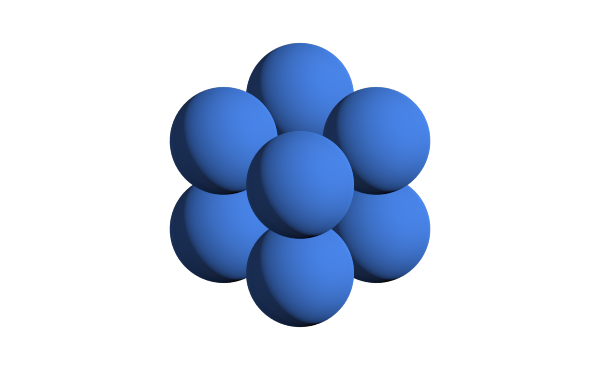

In [6]:
fresnel.preview(scene)

Disable *anti-aliasing* if you desire a quicker render.

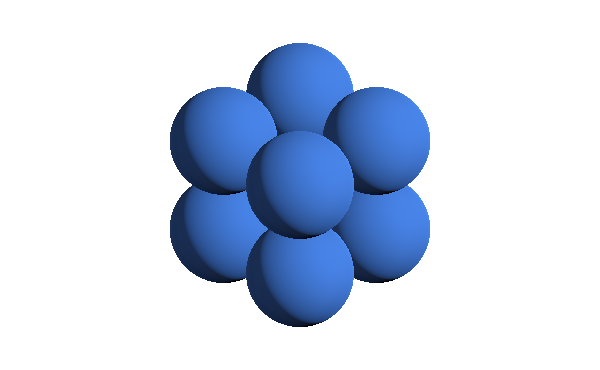

In [7]:
fresnel.preview(scene, anti_alias=False)

**preview** only applies direct lighting. Use **pathtrace** to account for indirect lighting. (anti-aliasing is always enabled when path tracing).

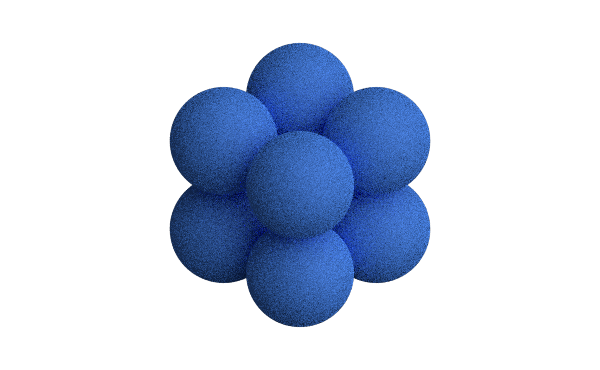

In [8]:
fresnel.pathtrace(scene)

The resulting image is noisy.  Increase the number of *light samples* to obtain a clean image.

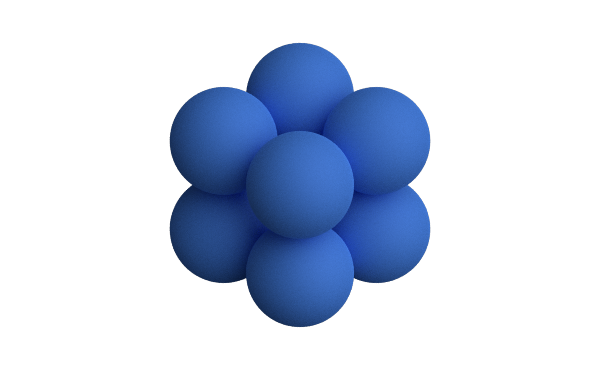

In [9]:
fresnel.pathtrace(scene, light_samples=40)

## Save output

*preview* and *pathtrace* return output buffers that can be used like ``HxWx4`` RGBA **numpy** arrays. You can pass this standard format on to other python libraries that work images (e.g. [**matplotlib**](https://matplotlib.org/)).

In [10]:
out = fresnel.preview(scene)
print(out[:].shape)
print(out[:].dtype)

(370, 600, 4)
uint8


Use [**Pillow**](https://pillow.readthedocs.io) to save the rendered output to a png file with transparency.

In [11]:
import PIL

In [12]:
image = PIL.Image.fromarray(out[:], mode='RGBA')
image.save('output.png')

To save a JPEG, create an RGB image. This ignores the alpha channel, so the scene background color will show.

In [13]:
image = PIL.Image.fromarray(out[:,:,0:3], mode='RGB')
image.save('output.jpeg')

This is what ``output.jpeg`` looks like (the default background color is black):

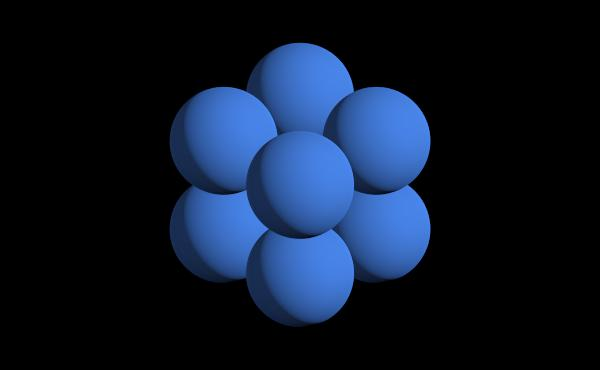

In [14]:
import IPython.display
IPython.display.Image('output.jpeg')

This page was generated from a [jupyter](https://jupyter.org/) notebook. You can download and run the notebook locally from the [fresnel-examples](https://github.com/glotzerlab/fresnel-examples) repository.